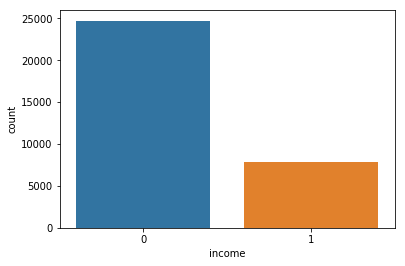

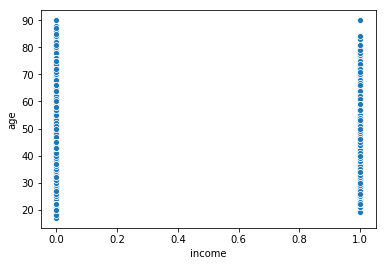

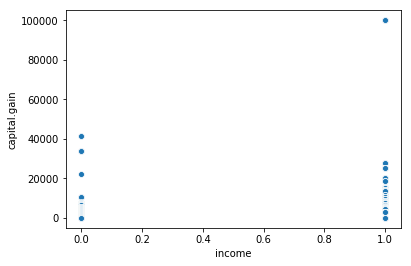

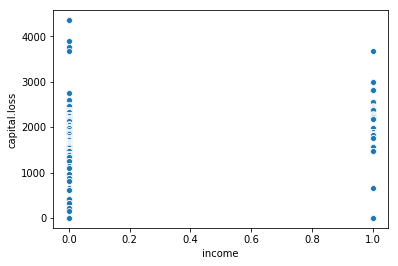

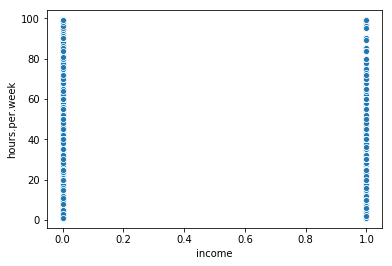

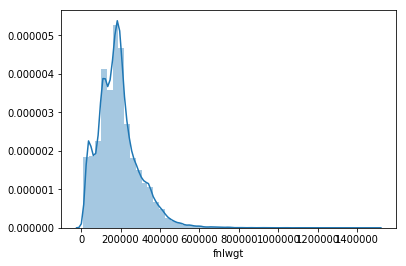

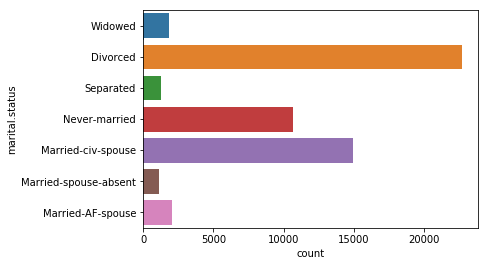

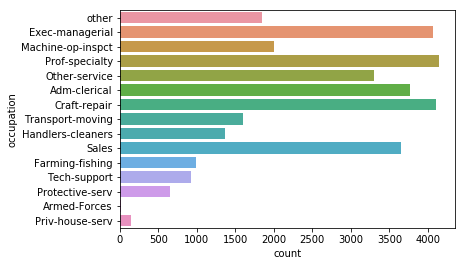

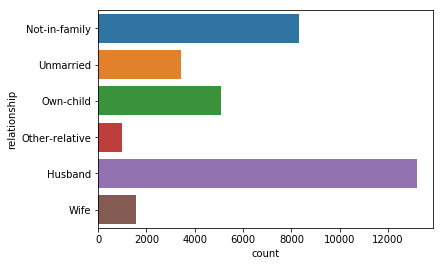

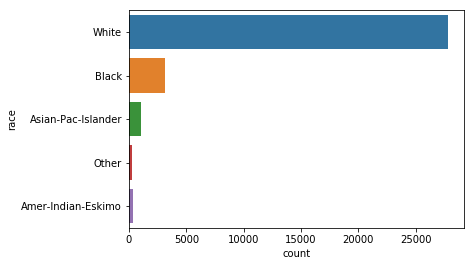

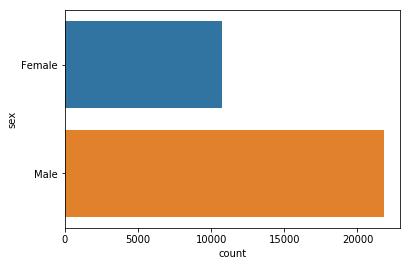

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('adult.csv',na_values=["?"])
data.head()
num=pd.DataFrame()
data.income.isnull().sum()
num['income']=data['income']
num['income'] = np.where(num['income'] == '>50K', 1, 0)
sns.countplot(x='income',data=num)
plt.show()
num['age']=data['age']
sns.scatterplot(x='income',y='age',data=num)
plt.show()
num['education.num']=data['education.num']

num['capital.gain']=data['capital.gain']
sns.scatterplot(x='income',y='capital.gain',data=num)
plt.show()

# REMOVING OUTLIER

# from scipy import stats
# z = np.abs(stats.zscore(num))
# # print(z)
# threshold = 5
# # print(np.where(z > 5))
# # print(z[1519][3])
# num = num[(z < 3).all(axis=1)]

#------------------------------------------------------
num['capital.loss']=data['capital.loss']
sns.scatterplot(x='income',y='capital.loss',data=num)
plt.show()
num['hours.per.week']=data['hours.per.week']
sns.scatterplot(x='income',y='hours.per.week',data=num)
plt.show()
num['fnlwgt']=data['fnlwgt']
sns.distplot(num['fnlwgt'])
plt.show()


#data['capital.gain'].value_counts().unique()
sns.distplot(data['education.num'])


# CATEGORICAL DATA::
cat=pd.DataFrame()
cat['workclass']=data['workclass']
cat['workclass'].fillna(value='other',inplace=True)
sns.countplot(y='workclass',data=cat)

cat['education']=data['education']

cat['marital.status']=data['marital.status']
sns.countplot(y='marital.status',data=cat)
plt.show()

cat['occupation']=data['occupation']
cat['occupation'].fillna(value='other',inplace=True)
sns.countplot(y='occupation',data=cat)
plt.show()

cat['relationship']=data['relationship']
sns.countplot(y='relationship',data=cat)
plt.show()

cat['race']=data['race']
sns.countplot(y='race',data=cat)
plt.show()

cat['sex']=data['sex']
sns.countplot(y='sex',data=cat)
plt.show()

cat['native.country']=data['native.country']
cat['native.country'].fillna(value='other',inplace=True)


# Feature Engineering
# cat is for categorical data whereas num is for numerical data

cat["workclass"] = cat["workclass"].replace(['Private','Self-emp-not-inc','Self-emp-inc'], 'Pri')

cat["workclass"] = cat["workclass"].replace(['Local-gov','State-gov','Fedral-gov'], 'Govt')
cat["workclass"] = cat["workclass"].replace(['other','Without-Pay','Never-worked'], 'Oth')

cat["workclass"] = cat["workclass"].map({"Pri":1, "Govt":0,"Oth":2})
# cat["workclass"] = cat["workclass"].astype(int)
cat_workclass_one_hot = pd.get_dummies(cat["workclass"], 
                                     prefix='workclass')
cat_workclass_one_hot

cat["education"] = cat["education"].replace(['Preschool','1st-4th','5th-6th','12th','9th','7th-8th','10th','11th'], 'School')

cat["education"] = cat["education"].replace(['HS-grad','Some-college','Bachelors','Prof-school','Assoc-voc','Assoc-acdm'], 'Graduation')
cat["education"] = cat["education"].replace(['Masters','Doctorate'], 'Higher')

cat["education"] = cat["education"].map({"School":1, "Graduation":0,"Higher":2})
cat_education_one_hot = pd.get_dummies(cat["education"], 
                                     prefix='edcation')
cat_education_one_hot

cat["marital.status"] = cat["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
cat["marital.status"] = cat["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
cat["marital.status"] = cat["marital.status"].map({"Married":1, "Single":0})
# dataset["marital.status"] = dataset["marital.status"].astype(int)
cat_marital_one_hot = pd.get_dummies(cat["marital.status"], 
                                     prefix='marital.status')
cat_marital_one_hot

cat["occupation"] = cat["occupation"].replace(['Prof-specialty','Exec-managerial','Adm-clerical','Sales','Tech-support'], 'Office')
cat["occupation"] = cat["occupation"].replace(['Priv-house-serv','Armed-Forces','Protective-serv','Farming-fishing','Handlers-cleaners','Transport-moving','Machine-op-inspct','Craft-repair'], 'Non-Office')
cat["occupation"] = cat["occupation"].replace(['Other-service','other'], 'Other')

cat["occupation"] = cat["occupation"].map({"Office":1,"Non-Office":0,"Other":2})
cat_occu_one_hot = pd.get_dummies(cat["occupation"], 
                                     prefix='occupation')
cat_occu_one_hot

cat["relationship"] = cat["relationship"].replace(['Husband','Wife','Own-child','Other-relative'], 'Related')
cat["relationship"] = cat["relationship"].replace(['Not-in-family','Unmarried'], 'Non-Related')
cat["relationship"] = cat["relationship"].map({"Related":1, "Non-Related":0})
cat_reln_one_hot = pd.get_dummies(cat["relationship"], 
                                     prefix='relationship')
cat_reln_one_hot

cat["race"] = cat["race"].replace(['White'], 'White')
cat["race"] = cat["race"].replace(['Black'], 'Black')
cat["race"] = cat["race"].replace(['Asian-Pac-Islander','Amer-Indian-Eskimo','Other'], 'Oth')

cat["race"] = cat["race"].map({"White":1,"Black":0,"Oth":2})
cat_race_one_hot = pd.get_dummies(cat["race"], 
                                     prefix='race')
cat_race_one_hot

cat["sex"] = cat["sex"].map({"Male": 0, "Female":1})

cat_con_enc = pd.concat([cat_workclass_one_hot, 
                        cat_education_one_hot, 
                        cat_marital_one_hot, 
                        cat_occu_one_hot,
                       cat_reln_one_hot,
                       cat_race_one_hot], axis=1)
final=pd.concat([num,cat_con_enc],axis=1)


y=final['income']

final.drop('income',axis=1,inplace=True)
final.head()


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final,y,test_size=0.25)

from sklearn import model_selection, tree, preprocessing, metrics, linear_model

def fit_ml_algo(algo,X_train,y_train,cv):
    # first pass
    model=algo.fit(X_train,y_train)
    acc=round(model.score(X_train,y_train)*100,2)
    
    # Cross Validation
    train_pred=model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs=-1)
    
    #Cross validation accuracy matrix
    
    acc_cv=round(metrics.accuracy_score(y_train,train_pred)*100,2)
    return train_pred,acc,acc_cv



from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost

import warnings
warnings.filterwarnings('ignore')



In [162]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)


Accuracy: 79.92
Accuracy CV 10-Fold: 79.79


In [163]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(DecisionTreeClassifier(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)


Accuracy: 99.96
Accuracy CV 10-Fold: 80.83


In [164]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(KNeighborsClassifier(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)


Accuracy: 83.33
Accuracy CV 10-Fold: 77.74


In [165]:
model=GradientBoostingClassifier(n_estimators=250)
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(model, 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)


Accuracy: 87.54
Accuracy CV 10-Fold: 86.8


In [166]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LinearSVC(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 76.79
Accuracy CV 10-Fold: 68.32


In [158]:
from xgboost import XGBClassifier
mod=XGBClassifier(n_estimators=150)
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(mod, 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 86.44
Accuracy CV 10-Fold: 86.16


In [167]:
predictions=model.predict(X_test)
from sklearn.metrics import accuracy_score
print(" acc",(100*accuracy_score(y_test,predictions)))

acc 86.97948654956393


In [168]:
predictions=mod.predict(X_test)
from sklearn.metrics import accuracy_score
print("acc",(100*accuracy_score(y_test,predictions)))

acc 85.01412602874339
